In [1]:
import numpy as np
from tensorflow.keras import datasets, utils

In [2]:
# 데이터 준비하기

#1
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

NUM_CLASSES = 10
#2
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
#3
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

### #1.
CIFAR-10 데이터셋을 로드한다.  
x_train과 x_test는 각각 [50000, 32, 32, 3]와 [10000, 32, 32, 3] 크기의 넘파이 배열이다.  
y_train과 y_test는 각각 [50000, 1]과 [10000, 1] 크기의 넘파이 배열이다.
각 이미지의 클래스에 대해 0~9 범위의 정수 레이블을 담는다.

### #2.
픽셀 채널 값이 0과 1사이가 되도록 이미지의 스케일을 조정

### #3.
**레이블을 원 핫 인코딩한다.**  
y_train과 y_test의 크기는 각각 [50000, 10]과 [10000, 10]이 된다.

In [3]:
# 인덱스가 54인 이미지의 (12, 13) 위치에 있는 픽셀의 녹색 채널(1) 값
x_train[54, 12, 13, 1]

0.36862746

In [4]:
# 모델 만들기

from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation = 'relu')(x)
x = layers.Dense(units=150, activation = 'relu')(x)
output_layer = layers.Dense(units=10, activation = 'softmax')(x)
# Model 클래스를 사용하여 모델의 입력과 출력 층을 정의
model = models.Model(input_layer, output_layer)

In [5]:
# Dense 층의 일부로 정의된 렐루 활성화 함수
x = layers.Dense(units=200, activation = 'relu')(x)

# 별도의 층으로 일부로 정의된 렐루 활성화 함수
x = layers.Dense(units=200)(x)
x = layers.Activation('relu')(x)

# 모델 조사하기
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
from tensorflow.keras import optimizers

# 옵티마이저와 손실 함수 정의하기
opt = optimizers.Adam(learning_rate=0.0005)
# 손실 함수와 옵티마이저 전달
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [7]:
# 24-03-19
# 모델 훈련을 위한 fit 메서드 호출
model.fit(x_train, #1
          y_train, #2
          batch_size = 32, #3
          epochs = 10, #4
          shuffle = True ) #5

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8510 - accuracy: 0.3342
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6661 - accuracy: 0.4062
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5871 - accuracy: 0.4332
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5339 - accuracy: 0.4540
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4952 - accuracy: 0.4680
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4624 - accuracy: 0.4797
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4354 - accuracy: 0.4906
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4159 - accuracy: 0.4952
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3894 - accuracy: 0.5079
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.36

1. 원본 이미지 데이터
2. 원핫 인코딩된 클래스 레이블
3. 훈련 스텝마다 네트워크에 전달될 샘플의 갯수를 결정
4. 네트워크가 전체 훈련 데이터에 대해 반복하여 훈련할 횟수를 결정
5. 훈련 스텝마다 배치를 훈련 데이터에 중복을 허용하지 않고 랜덤하게 추출

In [8]:
# 테스트 세트에서 모델 성능 평가하기
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4481 - accuracy: 0.4815


[1.4480843544006348, 0.4814999997615814]

In [9]:
# predict 메서드를 사용해 테스트 세트에 대한 예측 만들기
CLASSES = np.array(['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'forg', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) #1
preds_single = CLASSES[np.argmax(preds, axis = -1)] #2
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 2ms/step


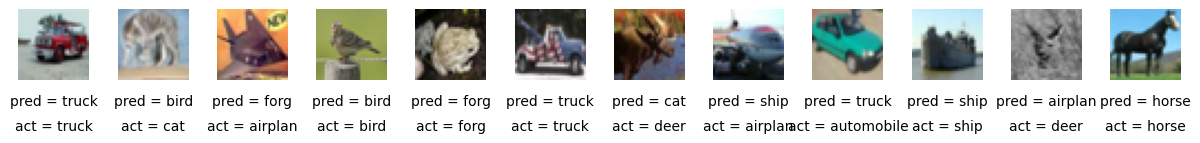

In [10]:
# MLP의 예측과 실제 레이블 출력하기
import matplotlib.pyplot as plt

n_to_show = 12
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx, in enumerate(indices):
	img = x_test[idx]
	ax = fig.add_subplot(1, n_to_show, i+1)
	ax.axis('off')
	ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
	ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
	ax.imshow(img)

In [11]:
# 흑백 이미지 입력에 적용한 Conv2D 층
from tensorflow.keras import layers

input_layer = layers.Input(shape=(64,64,1))
conv_layer_1 = layers.Conv2D(
	filters = 2,
	kernel_size = (3,3),
	strides = 1,
	padding = "same"		 
)(input_layer)

In [13]:
# 케라스를 사용해 합성곱 신경망 모델 만들기
from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(32,32,3))
conv_layer_1 = layers.Conv2D(
	filters = 10,
	kernel_size = (4,4),
	strides = 2,
	padding = 'same'
)(input_layer)
conv_layer_2 = layers.Conv2D(
	filters = 20,
	kernel_size = (3,3),
	strides = 2,
	padding = 'same'
)(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units = 10, activation = 'softmax')(flatten_layer)
model = models.Model(input_layer, output_layer)

In [14]:
# 모델 조사하기
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 10)        490       
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                12810     
                                                                 
Total params: 15120 (59.06 KB)
Trainable params: 15120 (59.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
